# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     631.3
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           2.29e-37
Time:                        13:44:23   Log-Likelihood:                -8.3534
No. Observations:                  50   AIC:                             24.71
Df Residuals:                      46   BIC:                             32.35
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0656      0.102     49.848      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.60135871  5.03974558  5.44448502  5.79262846  6.06950933  6.27115277
  6.40492867  6.48834085  6.54615115  6.60631125  6.69537017  6.83411242
  7.03414314  7.29598139  7.60897491  7.95305021  8.30201063  8.62784033
  8.90530727  9.11610873  9.25187837  9.31556085  9.32092801  9.29031617
  9.25095637  9.23050036  9.25247754  9.33242908  9.47535461  9.67489075
  9.91435664 10.16949451 10.41245521 10.6163737  10.75978294 10.83014084
 10.8258909  10.75671793 10.64195688 10.50741615 10.38113732 10.28878806
 10.24944493 10.27245923 10.35592053 10.48697061 10.64391601 10.79979219
 10.92679374 11.00084273]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.99620545 10.87951484 10.66728413 10.39714488 10.11863349  9.8810629
  9.72144912  9.65544841  9.67352405  9.7432813 ]


## Plot comparison

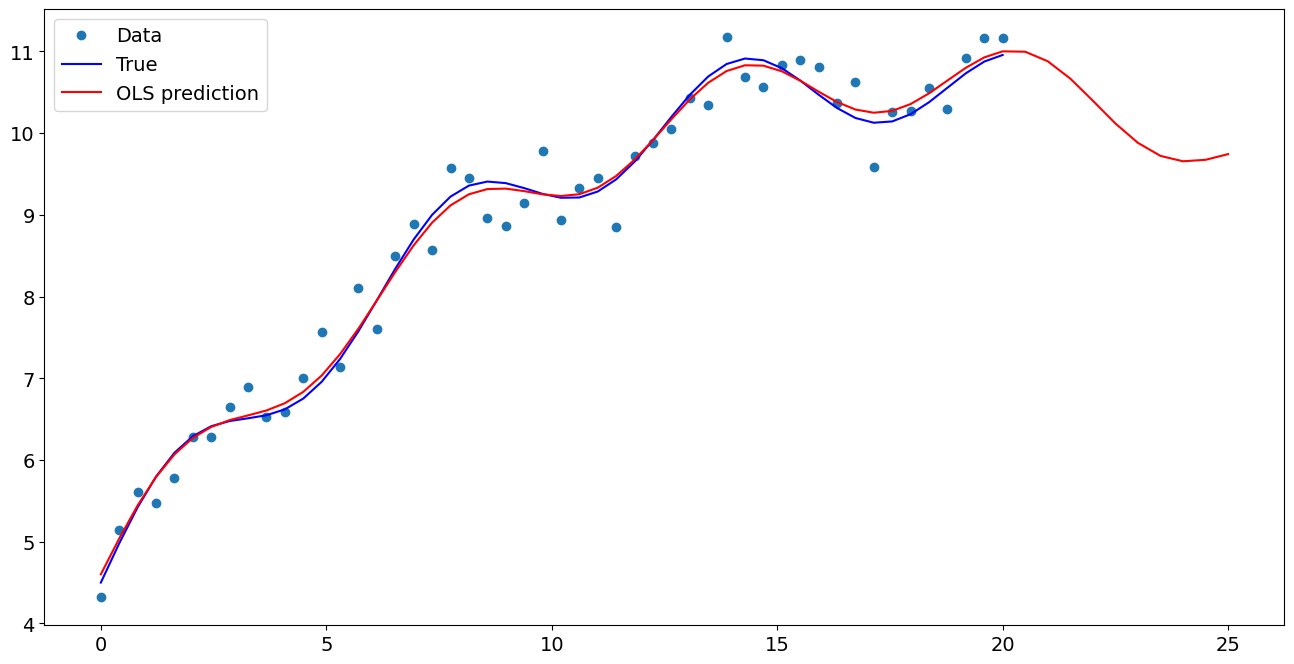

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.065593
x1                  0.486447
np.sin(x1)          0.421082
I((x1 - 5) ** 2)   -0.018569
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.996205
1    10.879515
2    10.667284
3    10.397145
4    10.118633
5     9.881063
6     9.721449
7     9.655448
8     9.673524
9     9.743281
dtype: float64